In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2pvaG5jaGVuL0RvY3VtZW50cy9Tb2x1dGlvbnMvY291cnNlLXdlYnNpdGUvc2xpZGVzLzA2'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.

In [2]:
#| label: setup

# Import all required libraries
# Data handling and manipulation
import pandas as pd
import numpy as np

# Machine learning models
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import mord as m
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Model evaluation and validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

# Metrics for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Utility for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

# For advanced visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Increase font size of all Seaborn plot elements
sns.set(font_scale = 1.25)

# Set Seaborn theme
sns.set_theme(style = "white")

In [3]:
#| code-fold: true
loans_class = pd.read_csv("data/loans_class.csv")

loans_class.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,risk
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,...,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Medium Risk
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,...,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Medium Risk
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,...,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Medium Risk
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,...,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Low Risk
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,...,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Medium Risk


In [4]:
# Encode categorical variables
categorical_columns = loans_class.select_dtypes(include = ['object', 'category']).columns.tolist()

# Encode categorical variables
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    loans_class[col] = label_encoders[col].fit_transform(loans_class[col])
    
# Define features and target
X = loans_class.drop('risk', axis = 1)
y = loans_class['risk']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Reduce dimensionality to prevent overfitting
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [5]:
def decisionplot(model, X, y, resolution=216):
    # Split the data into features (X) and the class variable (y)
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))

    # Predict outcomes for each point on the grid
    if isinstance(model, LinearDiscriminantAnalysis):
        # For LDA, we need to use the decision_function method
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    if isinstance(model, LinearDiscriminantAnalysis):
    # Reshape LDA decision function output appropriately
        Z = Z.reshape(-1, 1)
    else:
        Z = Z.reshape(xx.shape)

    # Plot the actual data points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', s=20)

    # Overlay the decision boundary
    plt.contourf(xx, yy, Z, alpha = 0.5)
    
    # Calculate the accuracy
    predictions = model.predict(X)
    acc = accuracy_score(y, predictions)
    
  
    # Set labels for axes
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

    plt.show()

Ordinal Logistic Regression Accuracy: 0.549


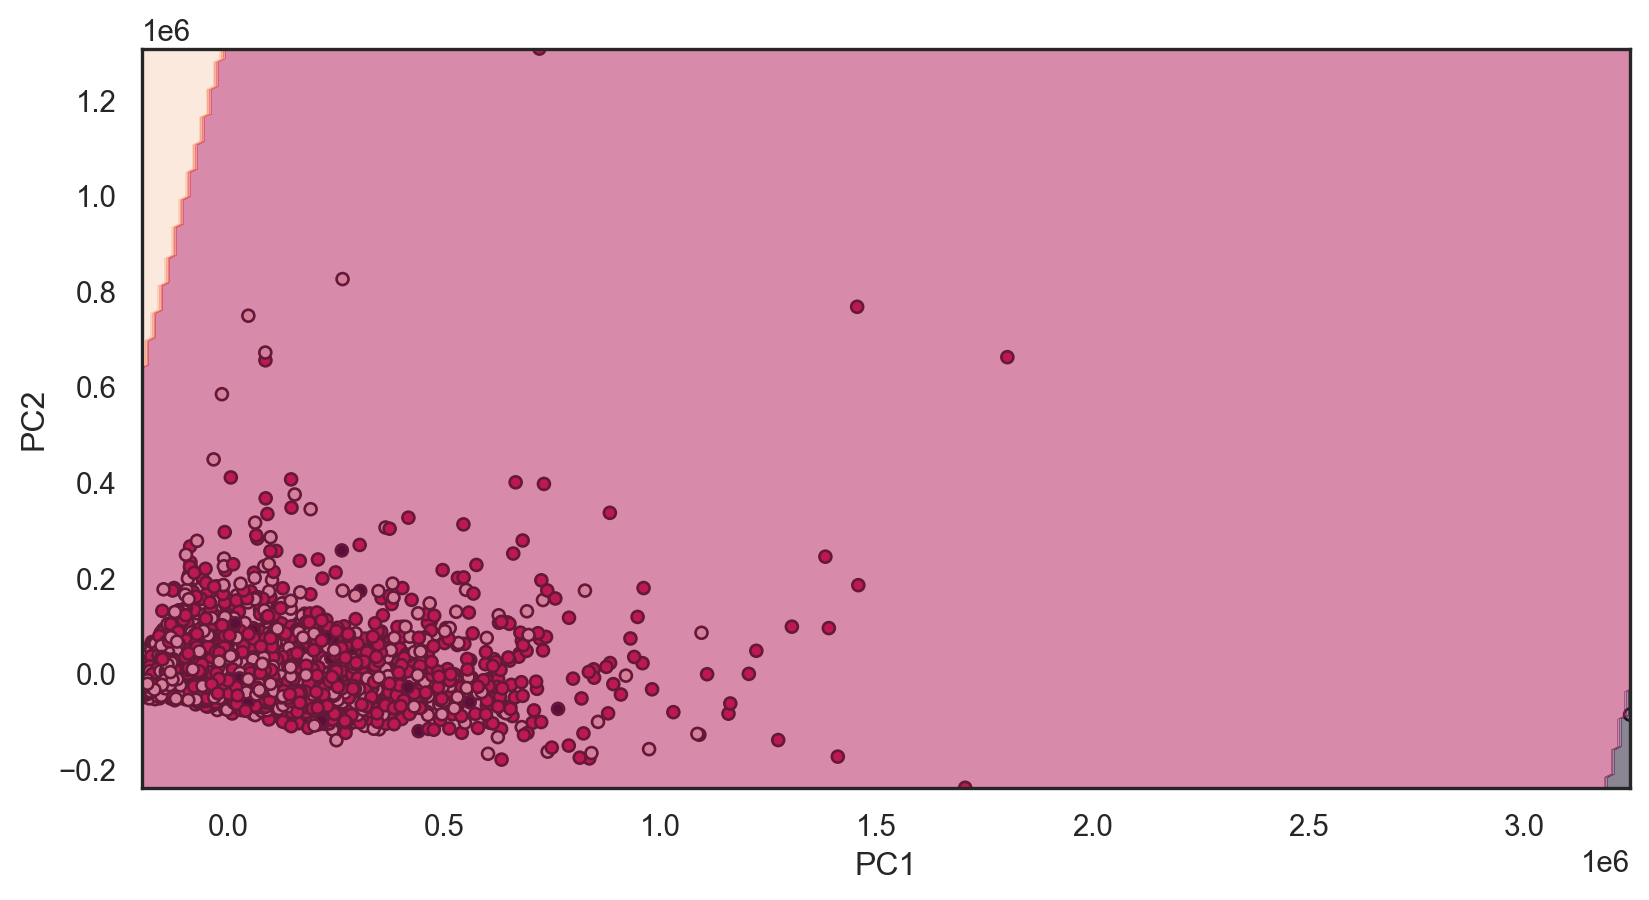

In [6]:
#| echo: false
ord_log_reg = m.LogisticAT(alpha = 1)  
ord_log_reg.fit(X_train_pca, y_train)

ordinal_predictions = ord_log_reg.predict(X_test_pca)
print("Ordinal Logistic Regression Accuracy:", round(accuracy_score(y_test, ordinal_predictions), 3))

decisionplot(ord_log_reg, pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2']), y_train)
plt.show()

/Users/johnchen/Documents/Solutions/course-website/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


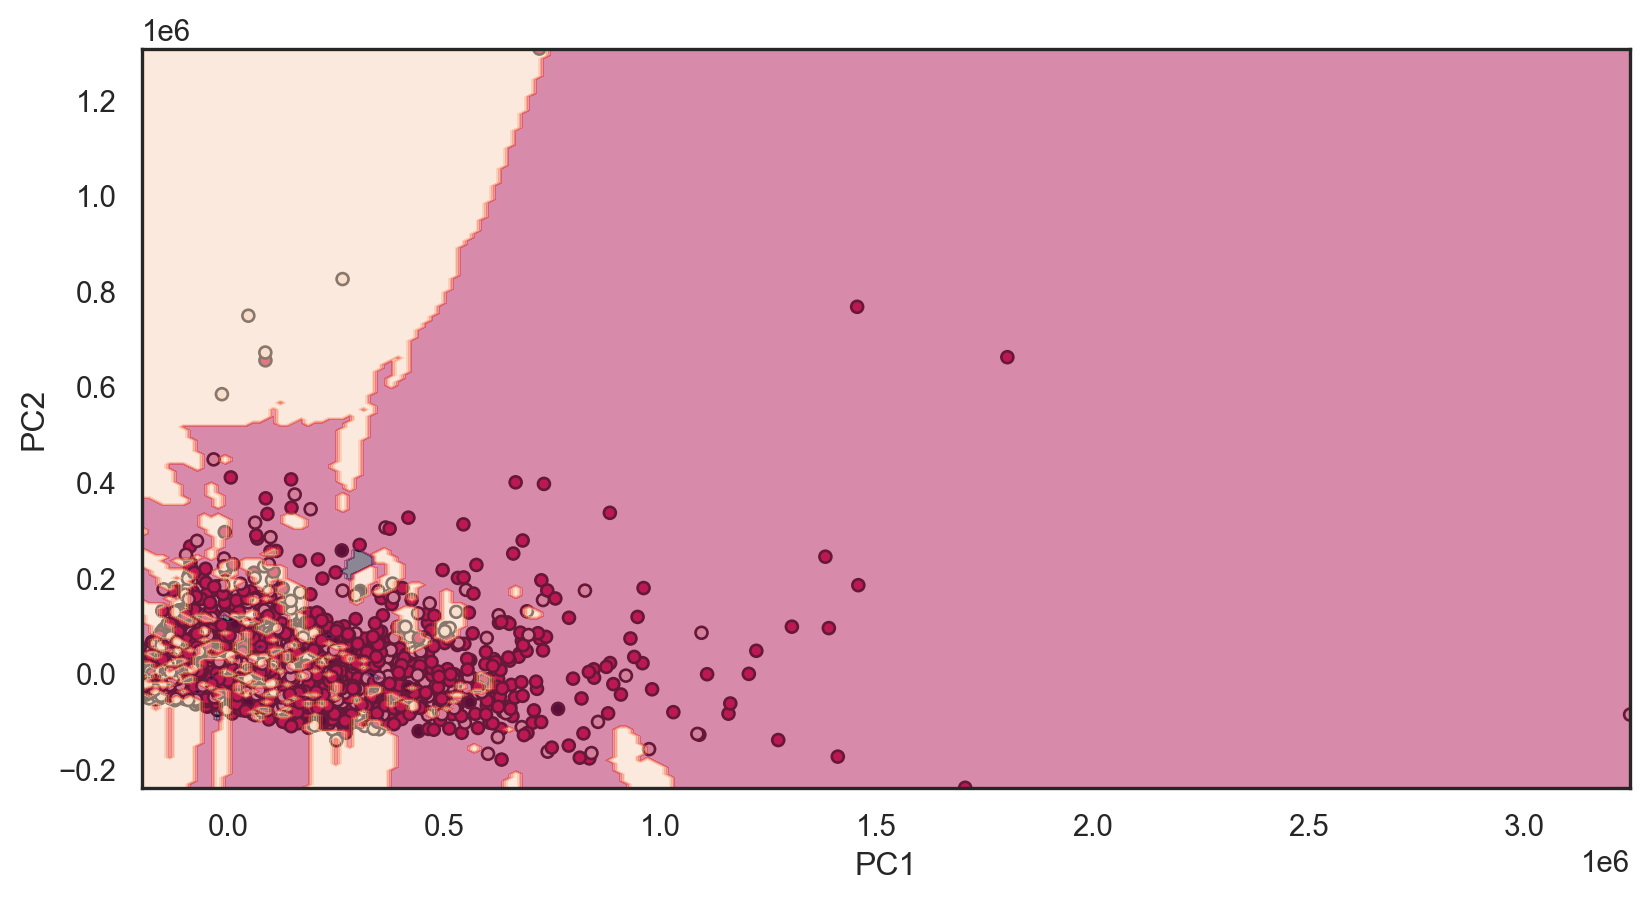

In [7]:
#| echo: false
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_pca, y_train)
predictions = knn.predict(X_test_pca)

decisionplot(knn, pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2']), y_train)
plt.show()

/Users/johnchen/Documents/Solutions/course-website/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


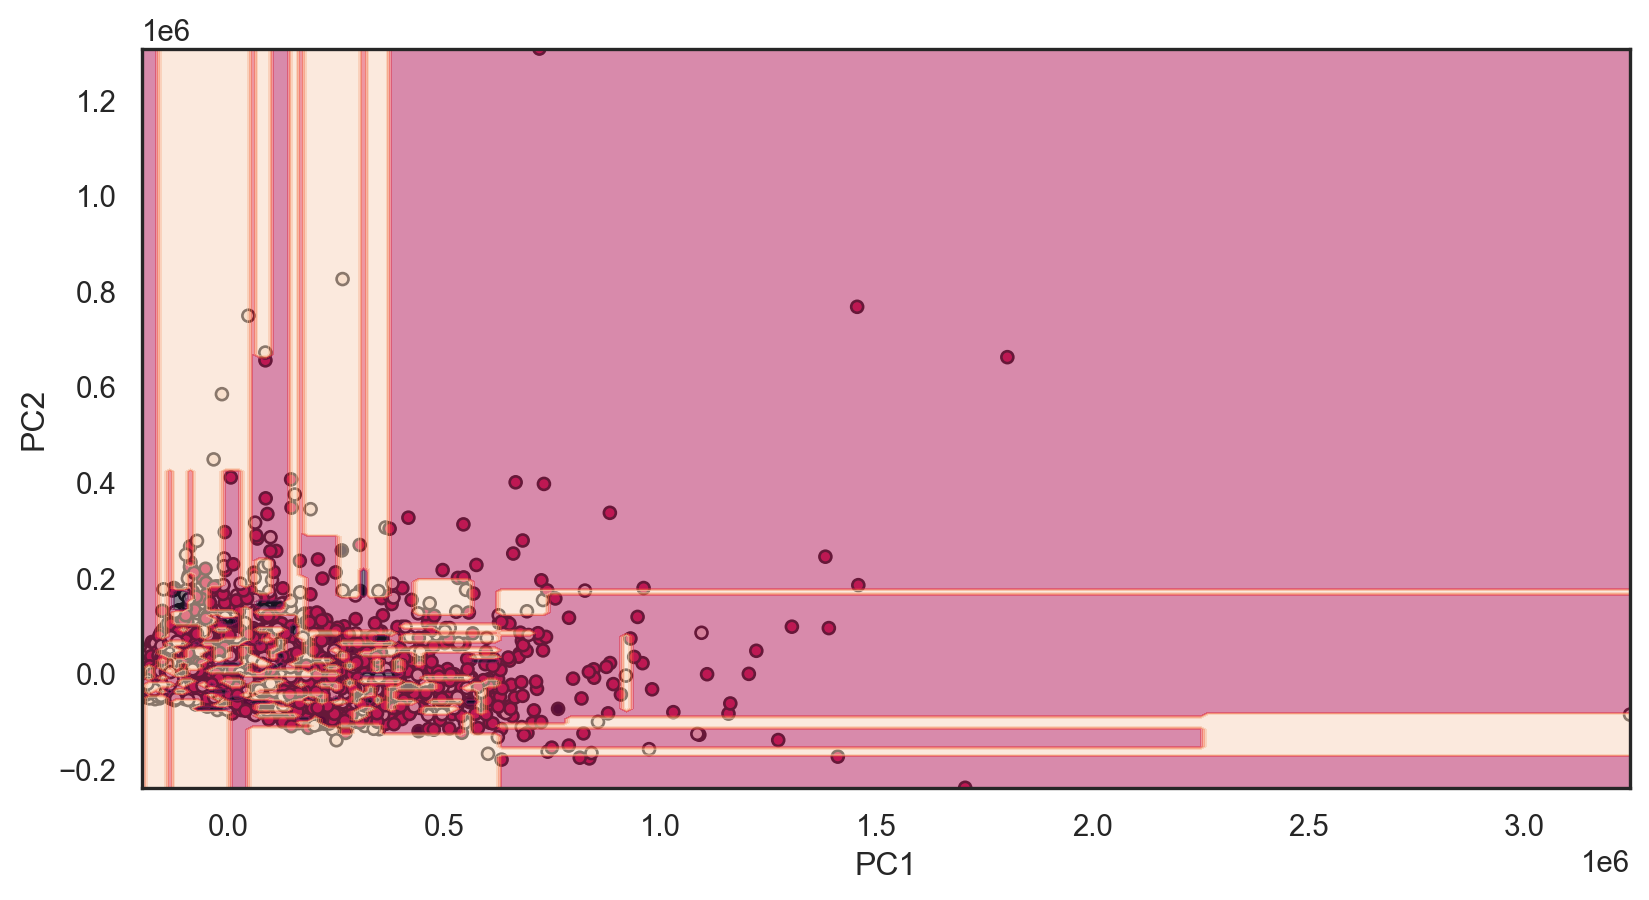

In [8]:
#| echo: false
dtree = DecisionTreeClassifier()
dtree.fit(X_train_pca, y_train)
predictions = dtree.predict(X_test_pca)

decisionplot(dtree, pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2']), y_train)
plt.show()

In [9]:
#| echo: false
dtree = DecisionTreeClassifier()
dtree.fit(X_train_pca, y_train)
predictions = dtree.predict(X_test_pca)

In [10]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.48


In [11]:
precision = precision_score(y_test, predictions, average = 'weighted') # Use 'weighted' for multiclass
print(f"Precision: {precision:.2f}")

Precision: 0.48


In [12]:
recall = recall_score(y_test, predictions, average = 'weighted') # Use 'weighted' for multiclass
print(f"Recall: {recall:.2f}")

Recall: 0.48


In [13]:
f1 = f1_score(y_test, predictions, average = 'weighted') # Use 'weighted' for multiclass
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.48


In [14]:
#| code-fold: true
# Binarize the output for multiclass
y_test_binarized = label_binarize(y_test, classes = np.unique(y_train))
n_classes = y_test_binarized.shape[1]

# Get the probability predictions for each class
y_score = dtree.predict_proba(X_test_pca)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate macro-average ROC-AUC
roc_auc_macro = np.mean(list(roc_auc.values()))
print(f"Macro-average ROC-AUC: {roc_auc_macro:.2f}")

# Calculate micro-average ROC-AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr["micro"], tpr["micro"])
print(f"Micro-average ROC-AUC: {roc_auc_micro:.2f}")

Macro-average ROC-AUC: 0.52
Micro-average ROC-AUC: 0.61


In [15]:
#| output: false
import time
start_time = time.time()

y_train = y_train.to_numpy()

loo = LeaveOneOut()
loo_f1_scores = []

for train_index, test_index in loo.split(X_train_pca):
    X_train_fold, X_test_fold = X_train_pca[train_index], X_train_pca[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    dtree.fit(X_train_fold, y_train_fold)
    prediction = dtree.predict(X_test_fold)
    f1 = f1_score(y_test_fold, prediction, average = 'weighted')
    loo_f1_scores.append(f1)

In [16]:
loo_f1_average = np.mean(loo_f1_scores)
print(f"LOOCV F1-Score: {loo_f1_average:.2f}")
loocv_time = time.time() - start_time
print(f"LOOCV took {loocv_time:.2f} seconds")

LOOCV F1-Score: 0.48
LOOCV took 248.01 seconds


In [17]:
#| output: false
start_time = time.time()

kf = KFold(n_splits = 5) 
kf_f1_scores = cross_val_score(dtree, X_train_pca, y_train, cv = kf, scoring = 'f1_weighted')

In [18]:
kf_f1_average = np.mean(kf_f1_scores)
print(f"k-Fold F1-Score: {kf_f1_average:.2f}")
kfold_time = time.time() - start_time
print(f"k-Fold CV took {kfold_time:.2f} seconds")

k-Fold F1-Score: 0.48
k-Fold CV took 0.14 seconds


In [19]:
start_time = time.time()
n_iterations = 100  
n_size = int(len(X_train_pca) * 0.50)  
bootstrap_f1_scores = []

for _ in range(n_iterations):
    X_sample, y_sample = resample(X_train_pca, y_train, n_samples=n_size)
    dtree.fit(X_sample, y_sample)

    predictions = dtree.predict(X_test_pca)
    f1 = f1_score(y_test, predictions, average='weighted')
    bootstrap_f1_scores.append(f1)

In [20]:
bootstrap_f1_average = np.mean(bootstrap_f1_scores)
print(f"Bootstrap F1-Score: {bootstrap_f1_average:.2f}")
bootstrap_time = time.time() - start_time
print(f"Bootstrap Method took {bootstrap_time:.2f} seconds")

Bootstrap F1-Score: 0.48
Bootstrap Method took 1.31 seconds


In [21]:
ratio = kfold_time / loocv_time
print(f"Ratio of k-Fold time to LOOCV time: {ratio:.4f}")
ratio = bootstrap_time / loocv_time
print(f"Ratio of Bootstrap time to LOOCV time: {ratio:.4f}")
ratio = kfold_time / bootstrap_time
print(f"Ratio of k-Fold time to Bootstrap time: {ratio:.4f}")

Ratio of k-Fold time to LOOCV time: 0.0006
Ratio of Bootstrap time to LOOCV time: 0.0053
Ratio of k-Fold time to Bootstrap time: 0.1047


In [22]:
# Logistic Regression
ord_log_reg = m.LogisticAT(alpha = 1)  

# KNN
knn = KNeighborsClassifier(n_neighbors = 5)

# Decision Tree
dtree = DecisionTreeClassifier()

In [23]:
# Define the number of folds
k = 5

# Logistic Regression
ord_log_reg_scores = cross_val_score(ord_log_reg, X_train_pca, y_train, cv = k, scoring = 'f1_weighted')
ord_log_reg_f1_average = np.mean(ord_log_reg_scores)

# KNN
knn_scores = cross_val_score(knn, X_train_pca, y_train, cv = k, scoring = 'f1_weighted')
knn_f1_average = np.mean(knn_scores)

# Decision Tree
dtree_scores = cross_val_score(dtree, X_train_pca, y_train, cv = k, scoring = 'f1_weighted')
dtree_f1_average = np.mean(dtree_scores)

In [24]:
print(f"Average F1-Score for Ordinal Logistic Regression: {ord_log_reg_f1_average:.2f}")
print(f"Average F1-Score for KNN: {knn_f1_average:.2f}")
print(f"Average F1-Score for Decision Tree: {dtree_f1_average:.2f}")

Average F1-Score for Ordinal Logistic Regression: 0.39
Average F1-Score for KNN: 0.49
Average F1-Score for Decision Tree: 0.48
